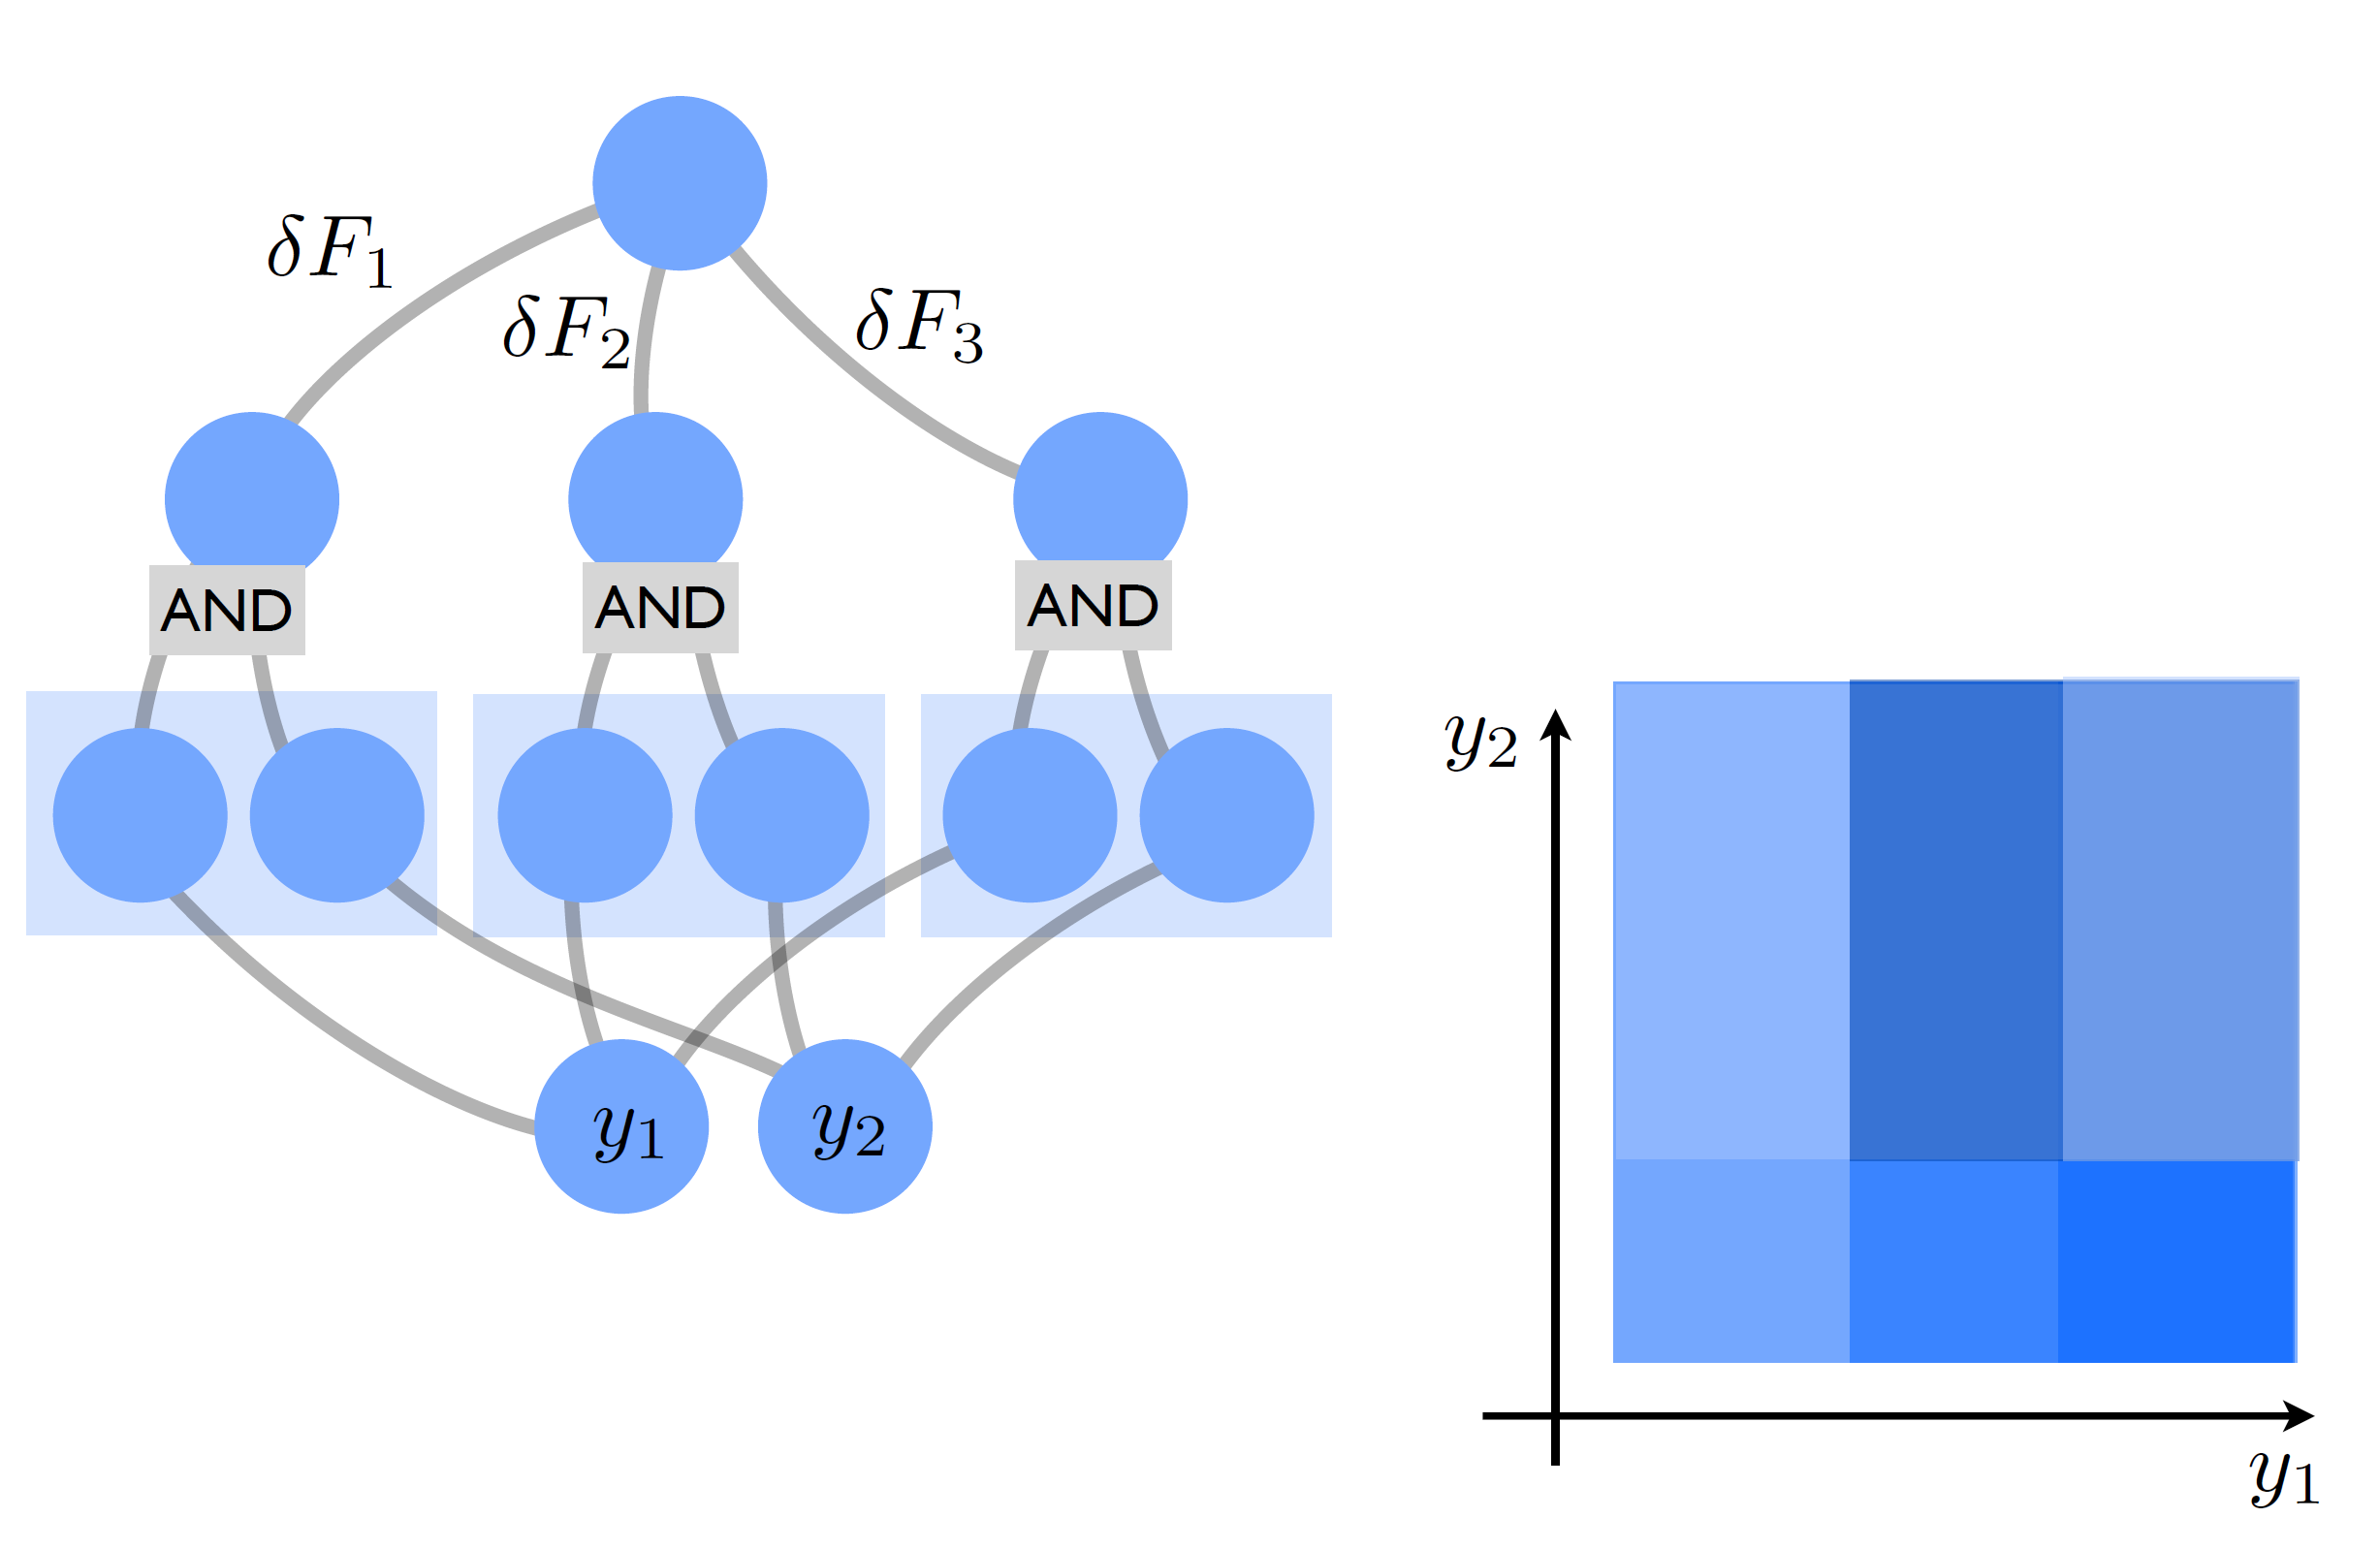

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Define the function to approximate

In [2]:
def f(x,y):
    return np.cos(x)*np.cos(y)

# Define the network

Define the number of points to sample from the function (number of neurons) and the approximation window (from `x_start` to `x_end` and from `y_start` to `y_end` )

In [3]:
Nx = 30
Ny = 20

x_start = -2
x_end = 2

y_start = -3
y_end = 3

Evaluate the function in `Nx*Ny ` points. We will use them to calculate the optimal weights and biases of the neural network.

In [4]:
x_steps = np.linspace(x_start,x_end,Nx)
y_steps = np.linspace(y_start,y_end,Ny)

x_grid, y_grid = np.meshgrid(x_steps, y_steps)

f_steps = f(x_grid,y_grid)

In [5]:
weights = np.zeros([Ny,Nx])
for i in range(0,Ny):
    for j in range(0,Nx):
        # We have to remove the contribution of all neurons that are already ON
        already_on = np.sum(weights[:i+1,:j+1])
        weights[i,j]=f_steps[i,j]-f_steps[0,0]-already_on
weights = weights.reshape([-1,Ny,Nx])

In [6]:
# Activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# First layer
roughness = 75
def apply_1(x_in,y_in):
    x_on = sigmoid(roughness*(x_in-x_grid))
    y_on = sigmoid(roughness*(y_in-y_grid))
    
    return (x_on,y_on)

# Second layer
def apply_and(x_in,y_in):
    return sigmoid(roughness*(x_in+y_in-1.5))

# Third layer
def apply_3(z_3):
    return np.sum(np.sum(np.multiply(z_3, weights),axis=-1),axis=-1) + f_steps[0,0]

def apply_net(x_in,y_in):
    z_1x, z_1y = apply_1(x_in,y_in)
    z_2 = apply_and(z_1x, z_1y)
    z_3 = apply_3(z_2)
    return z_3

# Evaluate the model and plot the results

Sample the function in `Mx*My` values and compare the output of the network with the real values

In [7]:
Mx = 100
x_in = np.linspace(x_start,x_end,Mx)

My = 100
y_in = np.linspace(y_start,y_end,My)

x_test, y_test = np.meshgrid(x_in, y_in)


f_out = apply_net(x_test.reshape([-1,1,1]),y_test.reshape([-1,1,1]))
f_out = f_out.reshape([My,Mx])

f_true = f(x_test,y_test)

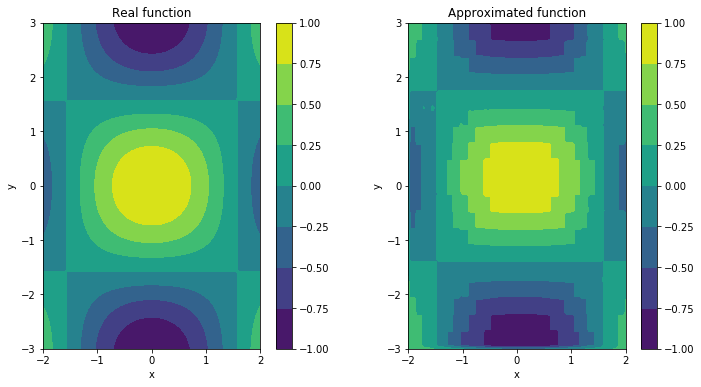

In [11]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.contourf(x_test,y_test,f_true)
plt.title("Real function")
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(x_test,y_test,f_out)
plt.title("Approximated function")
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()


plt.show()

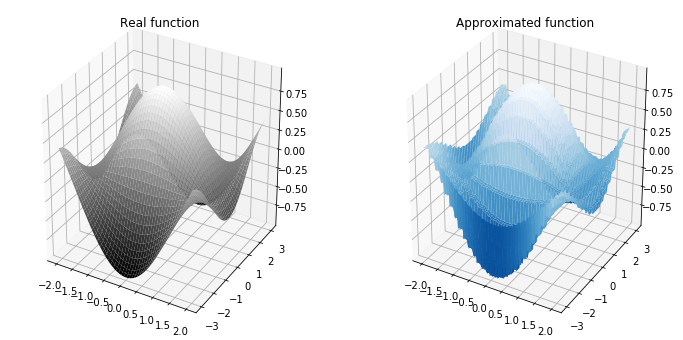

In [9]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(1,2,1,projection="3d")
plt.title("Real function")
ax.plot_surface(x_test,y_test,f_true, cmap=plt.cm.gray)

ax = fig.add_subplot(1,2,2,projection="3d")
plt.title("Approximated function")
ax.plot_surface(x_test,y_test,f_out, cmap=plt.cm.Blues_r)
plt.show()

# Cost function
How much the output of the network is different from the correct values.

In [10]:
cost = np.sum((f_true-f_out)**2)
print("Mean squared error: %1.5f" % cost)

Mean squared error: 116.41052


Increasing the number of neurons `Nx` and `Ny` will lead to a better approximation.